#**DIWALI SALES ANALYSIS**

This is an analysis of different products purchased by different groups of customers during diwali

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
%matplotlib inline

In [9]:
import micropip
await micropip.install('seaborn')

import seaborn as sns

**Importing the data**

In [10]:
df=pd.read_csv("Diwali Sales Data.csv")

**Understanding the data**

In [11]:
df.shape

(11251, 15)

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 967.0+ KB


**Removing empty columns**

In [14]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 791.2+ KB


In [16]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
df.shape

(11251, 13)

**Removing null values**

In [18]:
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [16]:
df['Amount']=df['Amount'].astype('int')

In [17]:
df['Amount'].dtypes

dtype('int32')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [20]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Performing EDA**

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Understanding cutomers based on gender**

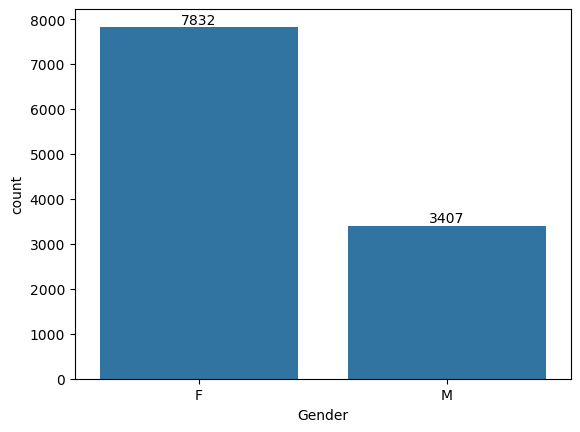

In [22]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

**Comparing amount generated and gender**

<Axes: xlabel='Gender', ylabel='Amount'>

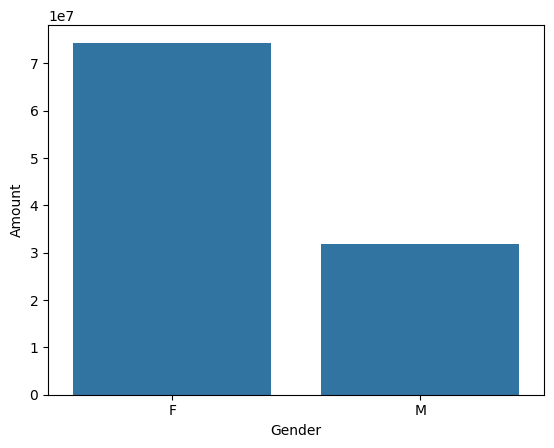

In [25]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

**Comparing amount generated alongside age group**

<Axes: xlabel='Age Group', ylabel='Amount'>

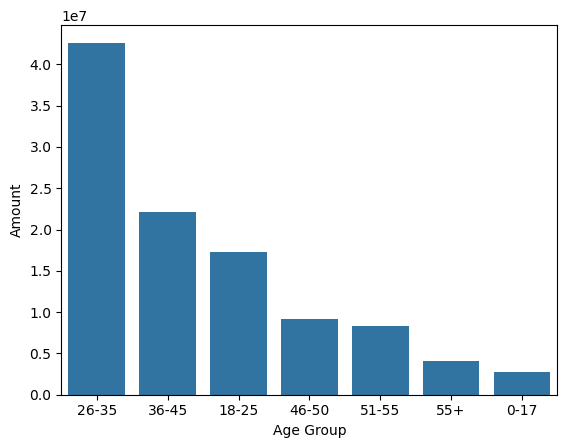

In [19]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

**Comparing gender with age group**

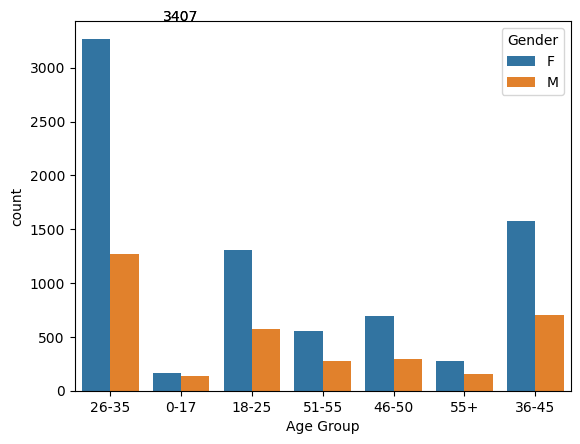

In [28]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bards in ax.containers:
    ax.bar_label(bars)

**Finding out the states from where there are maximum and minimum orders**

<Axes: xlabel='State', ylabel='Orders'>

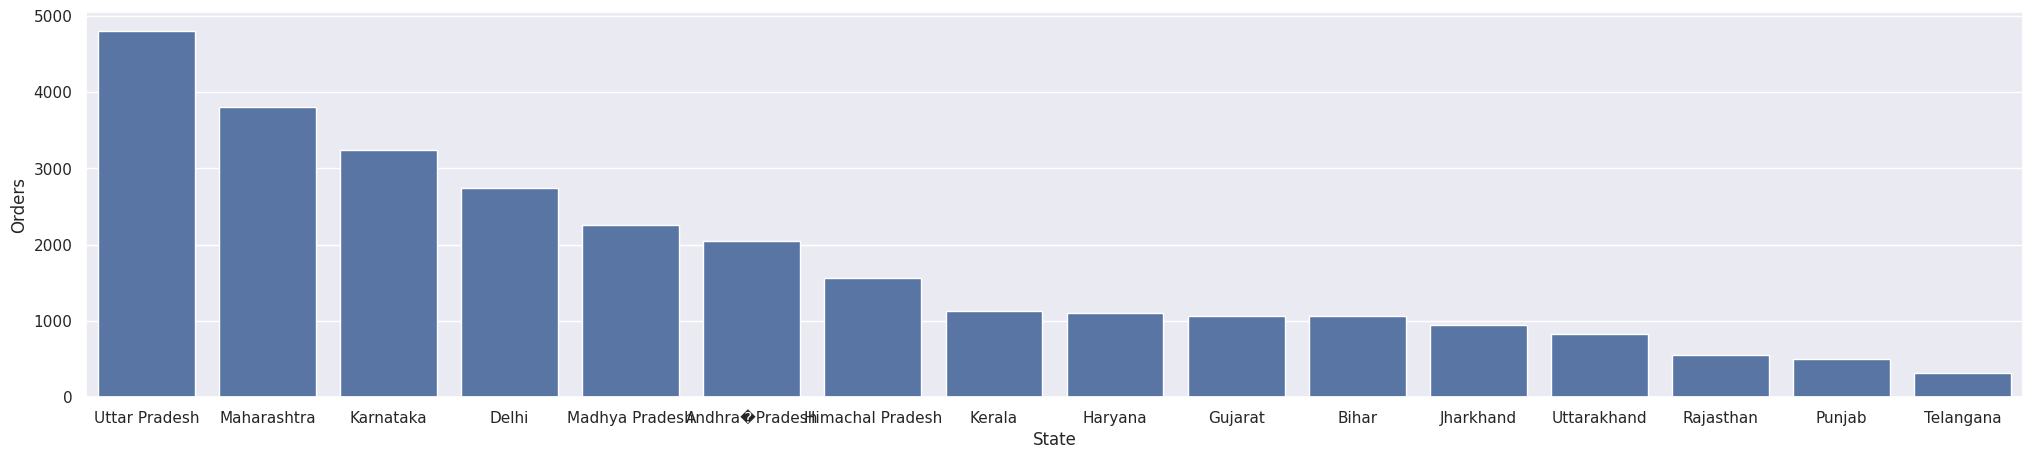

In [34]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

**Finding the amount spend by customers across different states**

<Axes: xlabel='State', ylabel='Amount'>

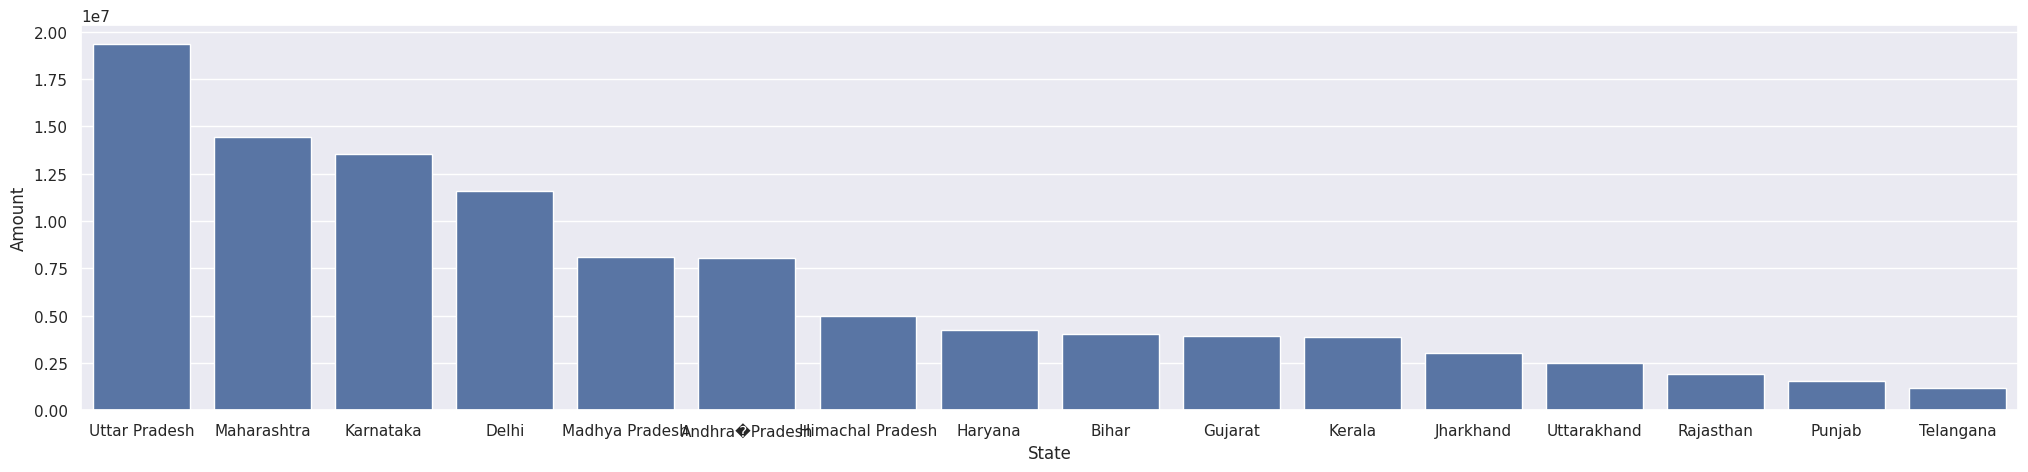

In [35]:
sales_state_amt=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Amount',data=sales_state_amt)

**Comparing amount spent by customers based on gender and marital status**

<Axes: xlabel='Marital_Status', ylabel='Amount'>

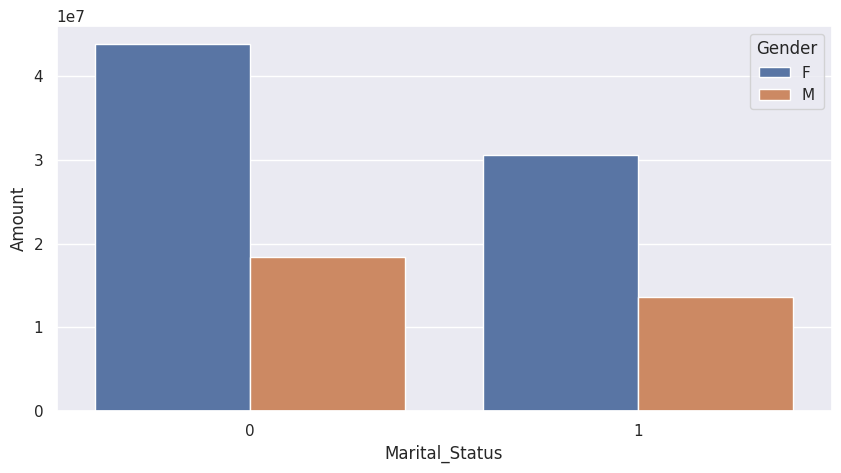

In [44]:
sales_state_marital=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_state_marital)

**Segregating cutomers based on marital status**

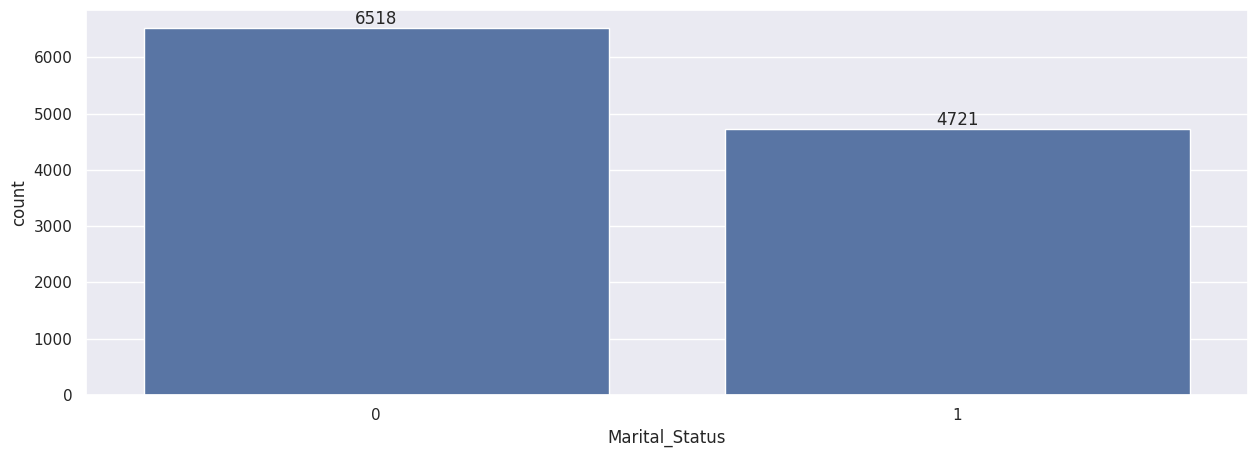

In [42]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

**Finding the count of cutomers across different occupations**

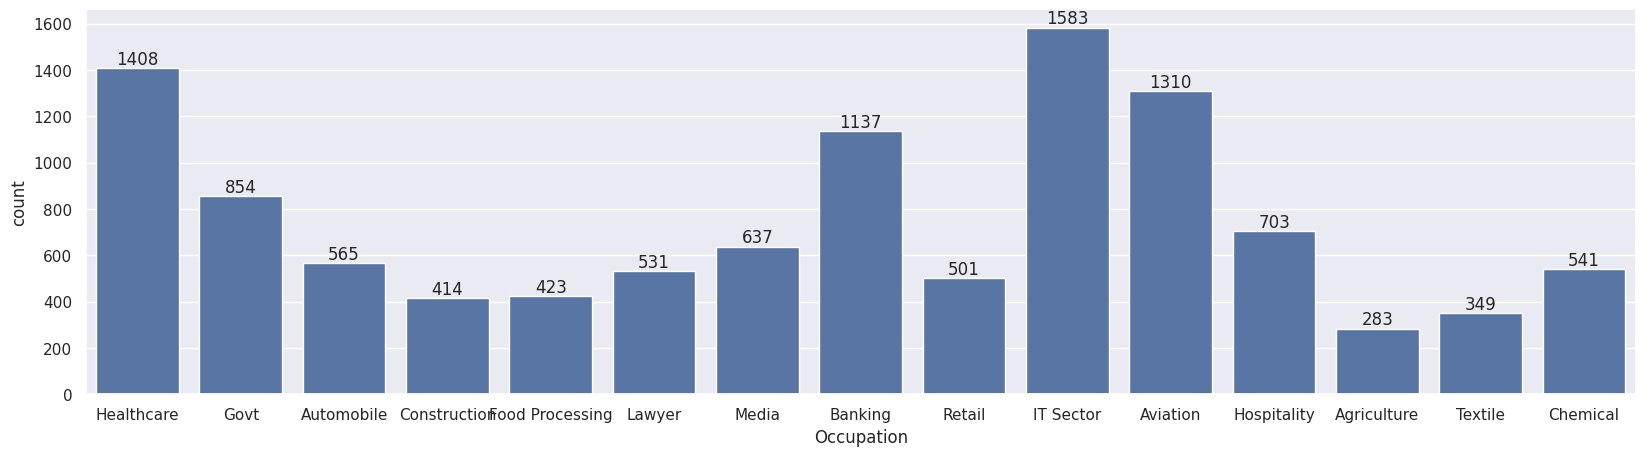

In [47]:
ax=sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

**Finding the amount spent by cutomers across different occupations**

<Axes: xlabel='Occupation', ylabel='Amount'>

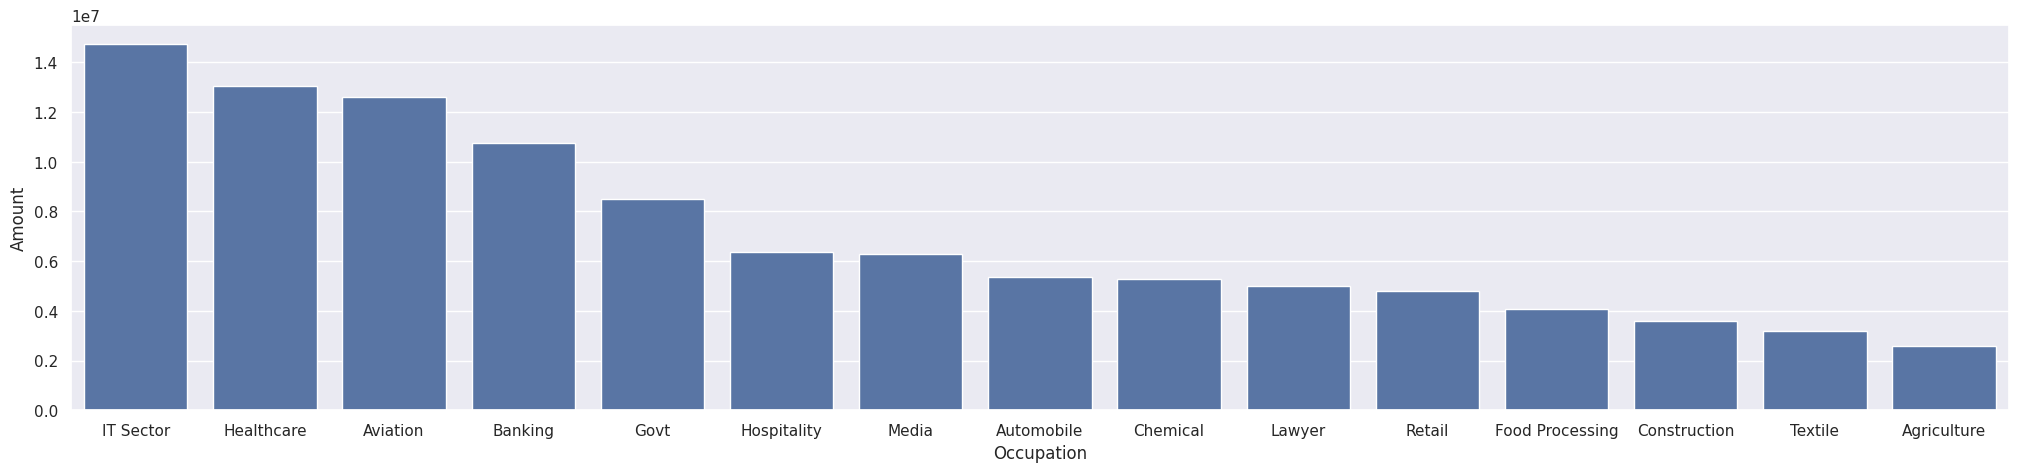

In [50]:
sales_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

**Finding the products that are bought more**

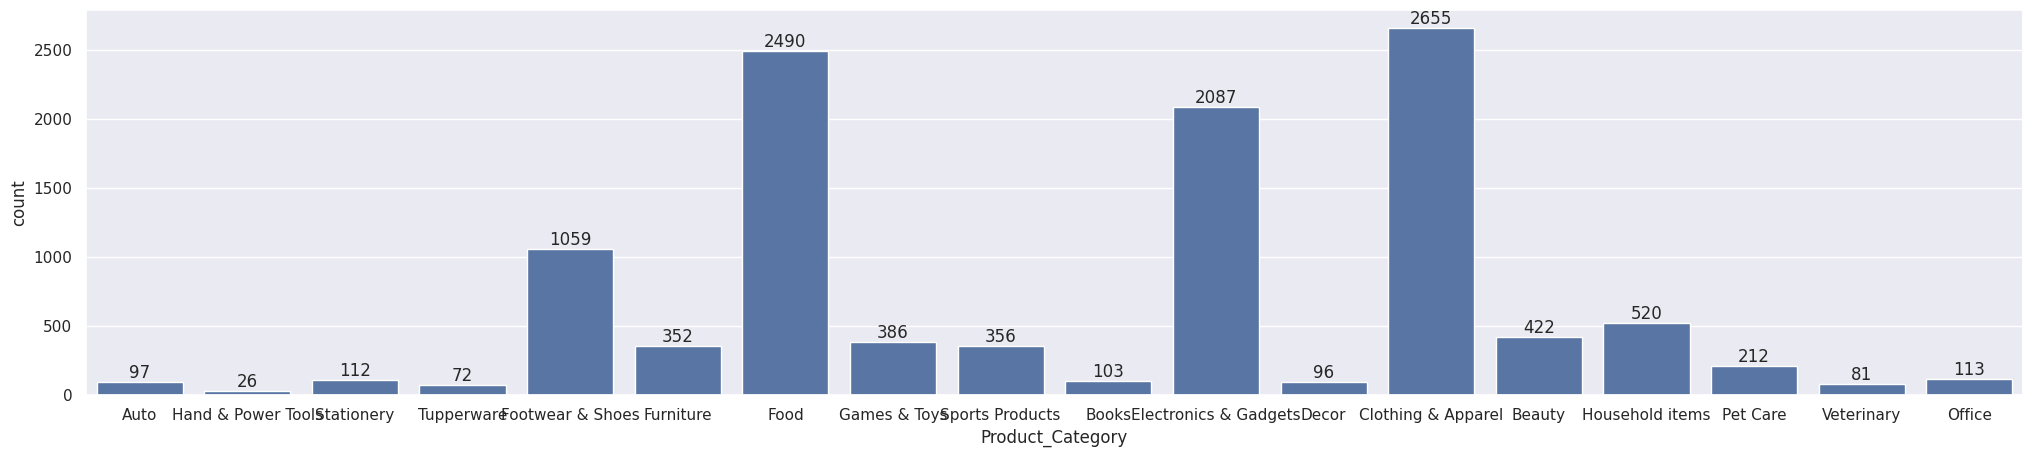

In [51]:
ax=sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

**Finding the amount spent by cutomers on different product categories**

<Axes: xlabel='Product_Category', ylabel='Amount'>

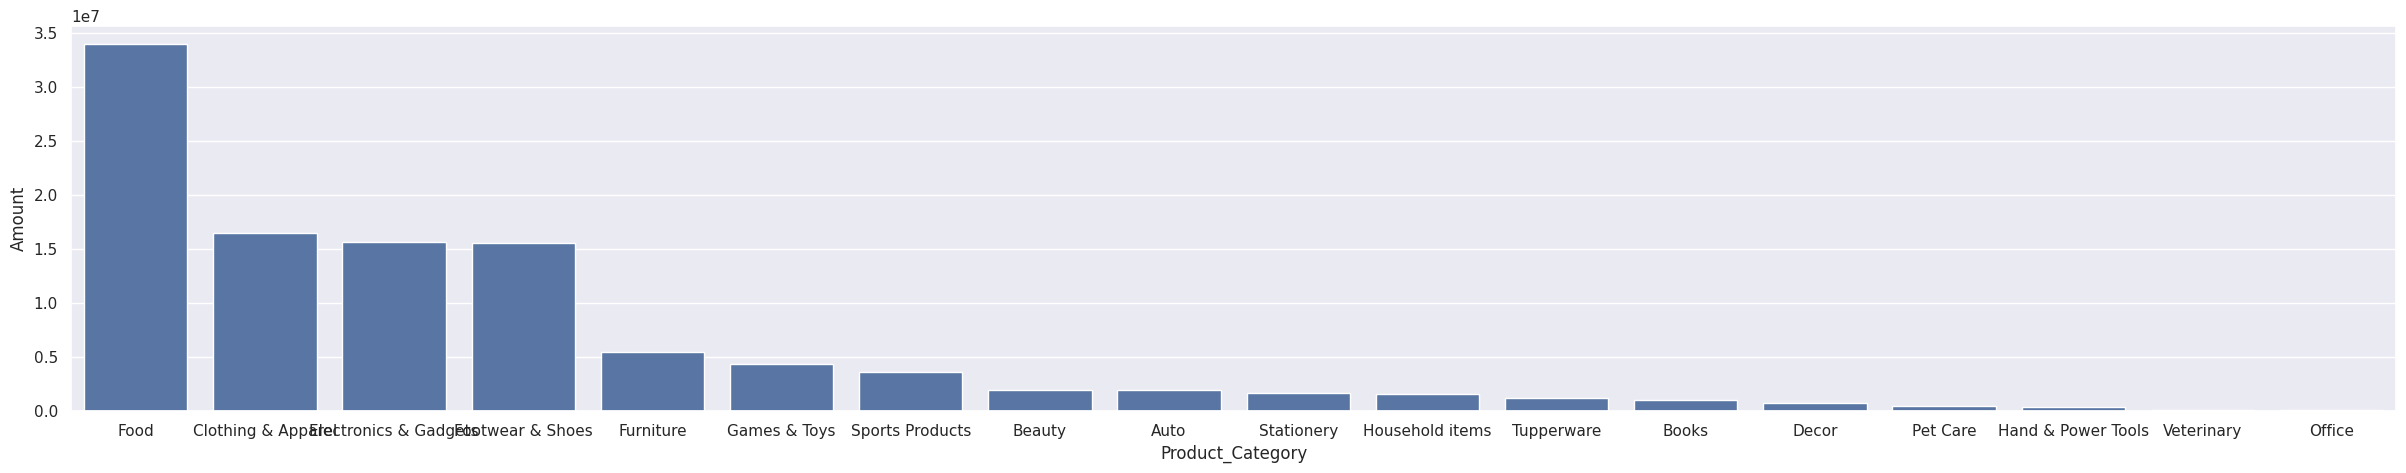

In [54]:
sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=sales_product,x='Product_Category',y='Amount')

**Finding the amount spent by cutomers based on different product IDs**

<Axes: xlabel='Product_ID', ylabel='Amount'>

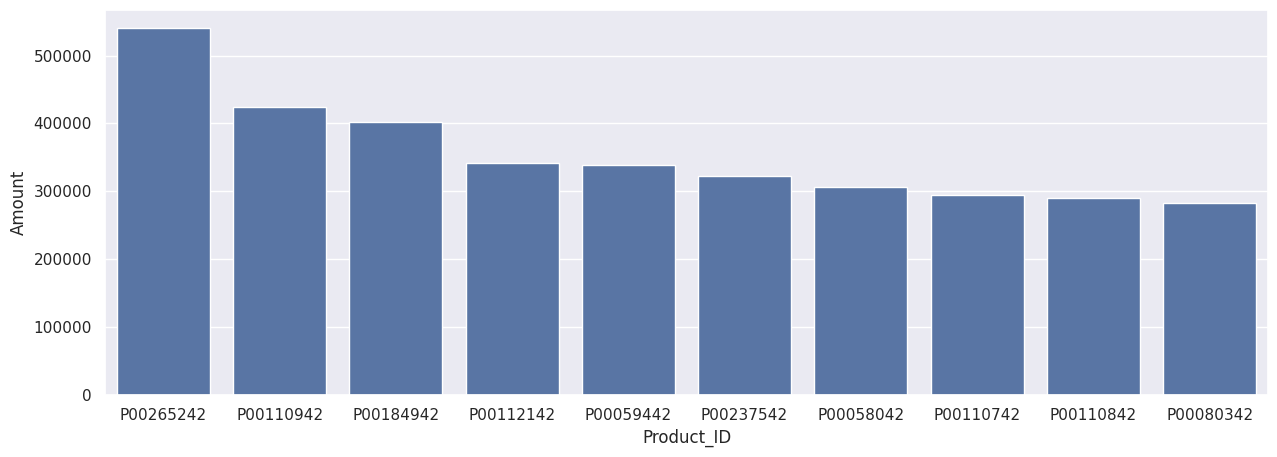

In [55]:
sales_ID=df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_ID,x='Product_ID',y='Amount')

#**CONCLUSION**

Married women between the ages of 25-30 years from UP, Maharashtra and Karnataka working in IT, Healthcare or Aviation are likely to buy products from the clothing and electronics category